## Machine Learning - K Nearest Neighbors

K Nearest Neighbors-Machine learning with python, I will be using `sci-kit-learn` package 

**The dataset I am using is anonymous and already cleaned**

In [1]:
# Importing data manipulation libraries 

import numpy as np
import pandas as pd


In [2]:
# import data visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# fetching our data 

df= pd.read_csv("Classified Data",index_col=0)

In [4]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


To predict the target class (1 or 0) using K-nearest neighbors, it is important to understand and utilize certain features that may be unfamiliar. 

The K-nearest neighbors classifier determines the class of a test observation based on its proximity to other observations. 

The scale of variables is significant, as those on a larger scale have a greater impact on the distance between observations. 

To address this, it is advisable to standardize all variables to the same scale when employing K-nearest neighbors for classification.

In [6]:
# import standard scaler from sklearn 

from sklearn.preprocessing import StandardScaler

In [7]:
# making an object

scaler = StandardScaler()

In [8]:
# fit it to our data

scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

the object fitted created and going to do is use transformer actually transform

transform method does it just performs the standardization by centering and scaling.

In [9]:
features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [10]:
features 

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

this is an array of the scaled version of the actual original values 

now I will use the scaled feature variable to recreate a feature data frame 

In [11]:
df_feat = pd.DataFrame(features,columns=df.columns[:-1])

# slice notation added because we do not need the last column

In [12]:
# it should return as data-frame 

df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


##### now we have a standard scale or standardized version of our data.

##### data is ready to be put into machine learning algorithms such as Kinnear's neighbors which depends on the distance between each feature. 

In [13]:
# train, test, split

from sklearn.model_selection import train_test_split

In [14]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

will start with K's equal to 1 and then see how we can use the elbow method to choose a caved value.

In [15]:
from sklearn.neighbors import KNeighborsClassifier


In [16]:
knn = KNeighborsClassifier(n_neighbors=1) # number of neighbors equal to 1

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
pred = knn.predict(X_test)

In [19]:
# should return an array of a prediction of what class our data fall into

pred 

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

Let's do a prediction and evaluation of our KNN model

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test,pred))

[[132  17]
 [ 11 140]]


In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       149
           1       0.89      0.93      0.91       151

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



##### now this data we got back with k=1, now we will use a method to find the best k value, by using an elbow method we will find a correct k value

In [23]:
# make a list 

error_rate = []

for i in range (1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
     
        
# now we append the mean through Numpy, that's the average of where my predictions were not equal to the actual y_test values.
    
    error_rate.append(np.mean(pred_i !=y_test))

In [24]:
error_rate


[0.09333333333333334,
 0.08333333333333333,
 0.06,
 0.06333333333333334,
 0.07,
 0.056666666666666664,
 0.06333333333333334,
 0.06333333333333334,
 0.06,
 0.06,
 0.06333333333333334,
 0.06,
 0.05333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.056666666666666664,
 0.06,
 0.06333333333333334,
 0.056666666666666664,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06,
 0.06666666666666667,
 0.056666666666666664,
 0.06]

now I will plot them into figures, to check what they look like

Text(0, 0.5, 'Error Rate')

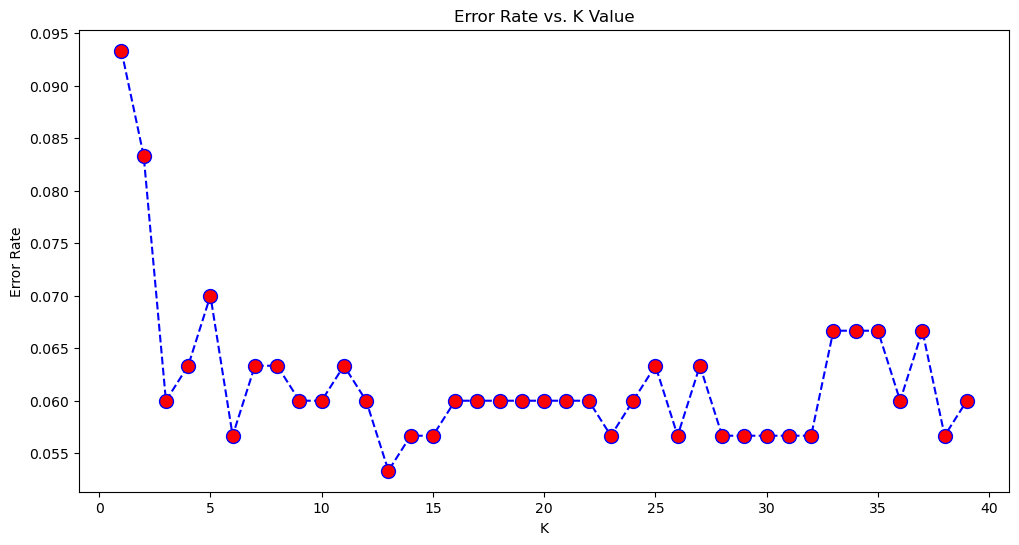

In [25]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [26]:
# a quick comparison with our original k value  K=1


knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[132  17]
 [ 11 140]]


              precision    recall  f1-score   support

           0       0.92      0.89      0.90       149
           1       0.89      0.93      0.91       151

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [27]:
# now with  K=20


knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[138  11]
 [  7 144]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       149
           1       0.93      0.95      0.94       151

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



##### comparing our old and new value, it looks like we were able to squeeze a little higher accuracy by choosing a better value.

### - - - - The end - - - -